In [1]:
#==========================================
Script for plotting Epsilometer data
READ ep_test.jl 
to study the sensors noise
the board and sensor are on a granit and in the dark 
==========================================#

using PyPlot
include("local_library.jl")

varnames=["T1","T2","Shear1","Shear2", "Cond1", "Accelx","Accely","Accelz"]

8-element Array{ASCIIString,1}:
 "T1"    
 "T2"    
 "Shear1"
 "Shear2"
 "Cond1" 
 "Accelx"
 "Accely"
 "Accelz"

In [2]:
fid = open("ep_test_v0.txt")
nblinesavailable = countlines(fid) # countlines changes the position of the file!!!
seekstart(fid)
fLines = readlines(fid) #grab the chunk size or more?

dataBuffer = zeros(UInt32, nblinesavailable, length(varnames));
for (linenum,line) in enumerate(fLines) #over each line
  lineData = split(line[1:end-1],',')
  for(ch, val) in enumerate(lineData)
      dataBuffer[linenum, ch] = parse(UInt32,val,16)
  end
end
Ax     = dataBuffer[:,end-2];
Ay     = dataBuffer[:,end-1];
Az     = dataBuffer[:,end];
Shear1 = dataBuffer[:,3];
Shear2 = dataBuffer[:,4];
T1     = dataBuffer[:,1];
T2     = dataBuffer[:,2];



In [3]:
    #== convert counts to g accelerometers ==#
    VAx = Count2Volt_accel(Ax);
    VAy = Count2Volt_accel(Ay);
    VAz = Count2Volt_accel(Az);
    VShear1=Count2Volt_accel(Shear1);
    VShear2=Count2Volt_accel(Shear2);
    VT1=Count2Volt_accel(T1);
    VT2=Count2Volt_accel(T2);

    #g=4.0283652963203685e6  #in counts check plot_test_flip.ipynb for more detail  
    g=4.0579239359399276e6 # with new set up 
#      gAx = Ax/g;    
#      gAy = Ay/g;   
#      gAz = Az/g;    
      gAx = Volt2g(VAx);    
      gAy = Volt2g(VAy);   
      gAz = Volt2g(VAz);    

    
timeaxis=maketimeaxis(size(dataBuffer,1));


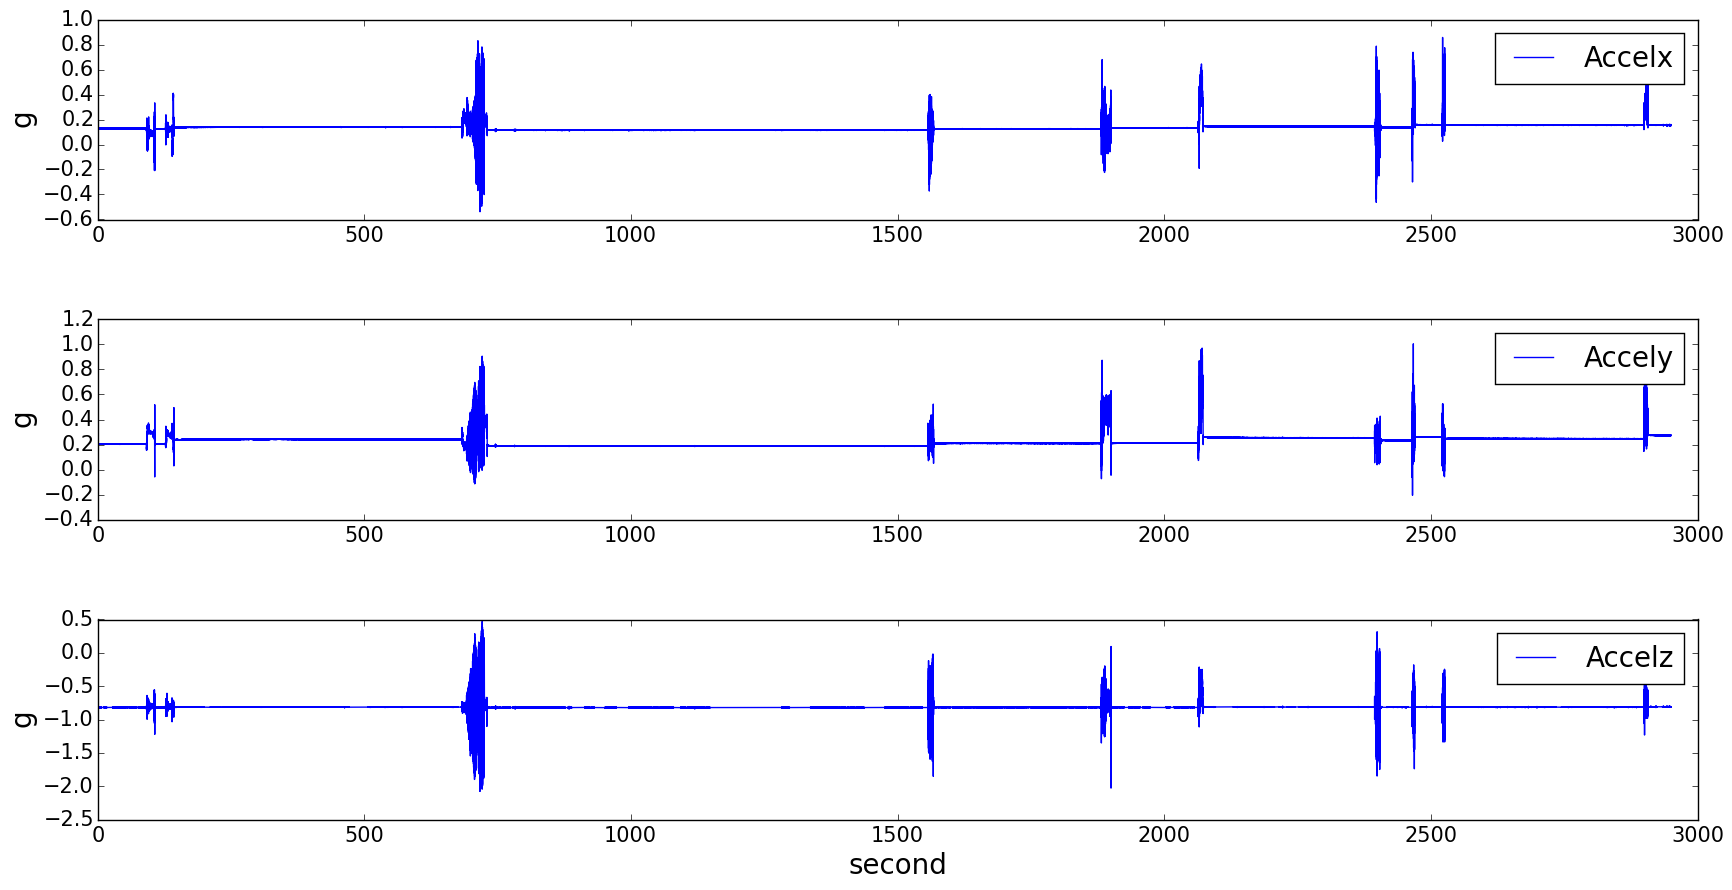

In [4]:
fig1=figure(figsize=(20, 10))
ax1=plt[:axes]([.1,.7,.8,.2])
plt[:xticks](fontsize=15)
plt[:yticks](fontsize=15)
ax2=plt[:axes]([.1,.4,.8,.2])
plt[:xticks](fontsize=15)
plt[:yticks](fontsize=15)
ax3=plt[:axes]([.1,.1,.8,.2])
plt[:xticks](fontsize=15)
plt[:yticks](fontsize=15)
    p1=ax1[:plot](timeaxis,gAx,label=varnames[end-2])
    p2=ax2[:plot](timeaxis,gAy,label=varnames[end-1])
    p3=ax3[:plot](timeaxis,gAz,label=varnames[end])
ax1[:legend](handles=p1,fontsize=20);
ax2[:legend](handles=p2,fontsize=20);
ax3[:legend](handles=p3,fontsize=20);
ax1[:set_ylabel]("g",fontsize=20)
ax2[:set_ylabel]("g",fontsize=20)
ax3[:set_ylabel]("g",fontsize=20)
ax3[:set_xlabel]("second",fontsize=20)

fig1[:savefig]("time_series_accelerometers.png")
plt[:draw]()


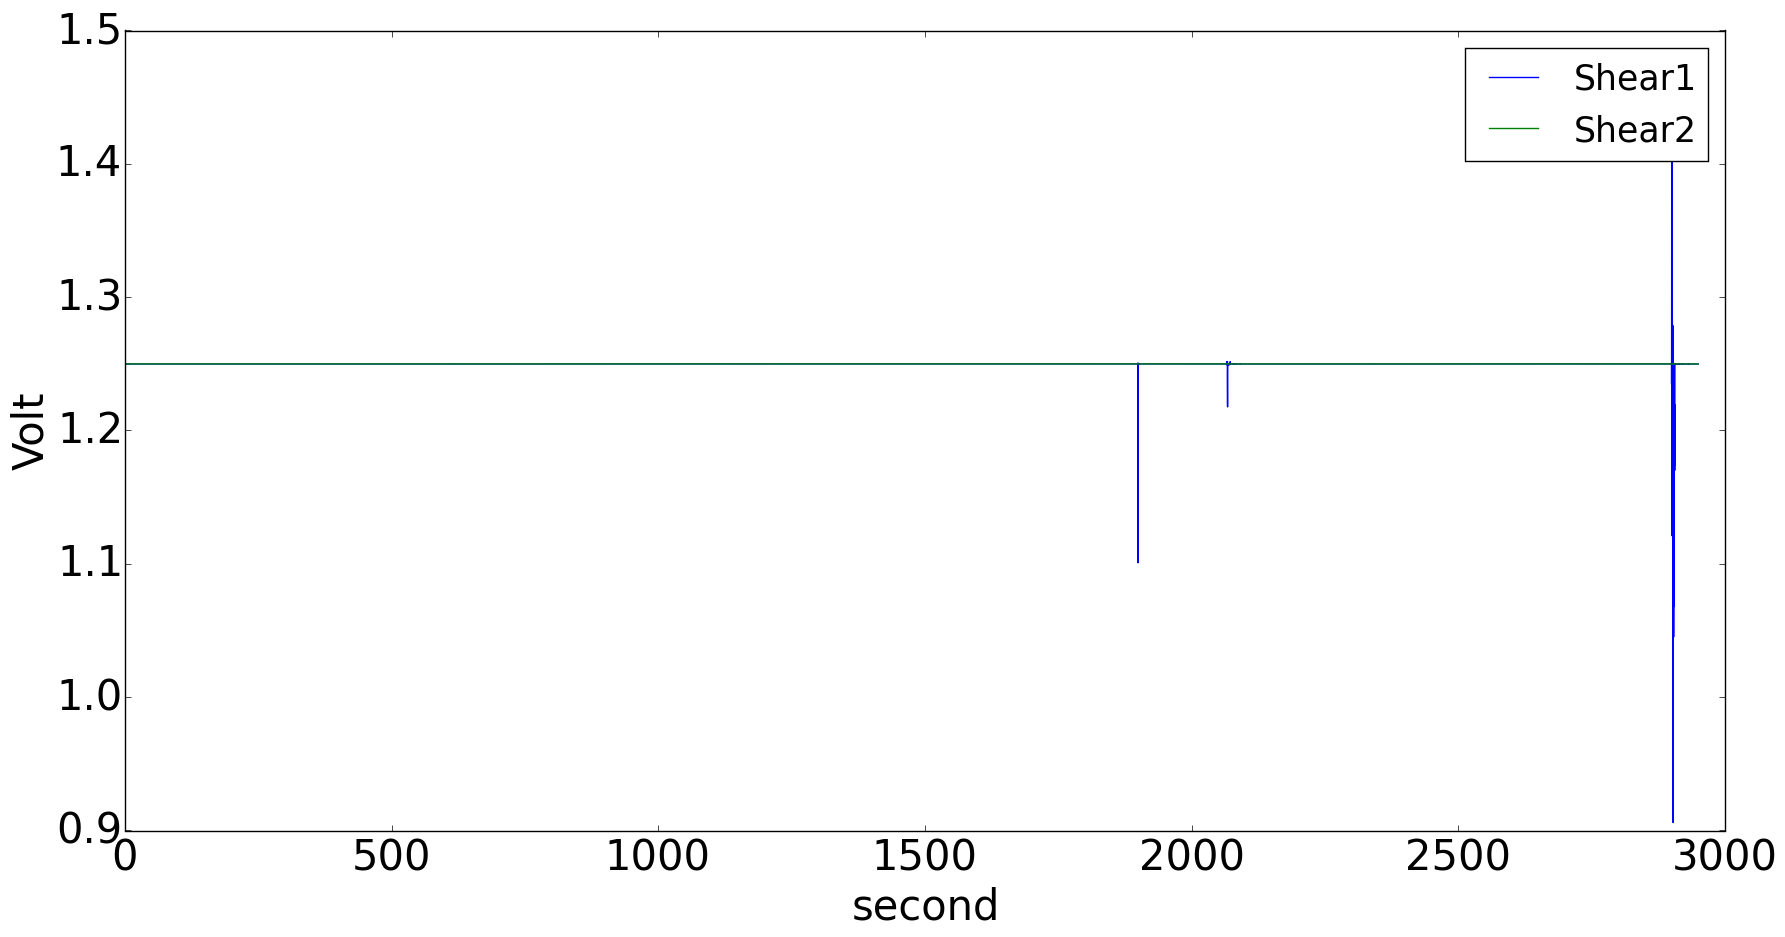

In [6]:
fig2=figure(figsize=(20, 10))
ax1=plt[:axes]([.15,.1,.8,.8])
    p1=ax1[:plot](timeaxis,VShear1,label=varnames[3])
    p2=ax1[:plot](timeaxis,VShear2,label=varnames[4])
ax1[:legend](fontsize=25);
ax1[:set_ylabel]("Volt",fontsize=30)
ax1[:set_xlabel]("second",fontsize=30)
plt[:xticks](fontsize=30)
plt[:yticks](fontsize=30)

fig2[:savefig]("time_series_shear_probes.png")
plt[:draw]()


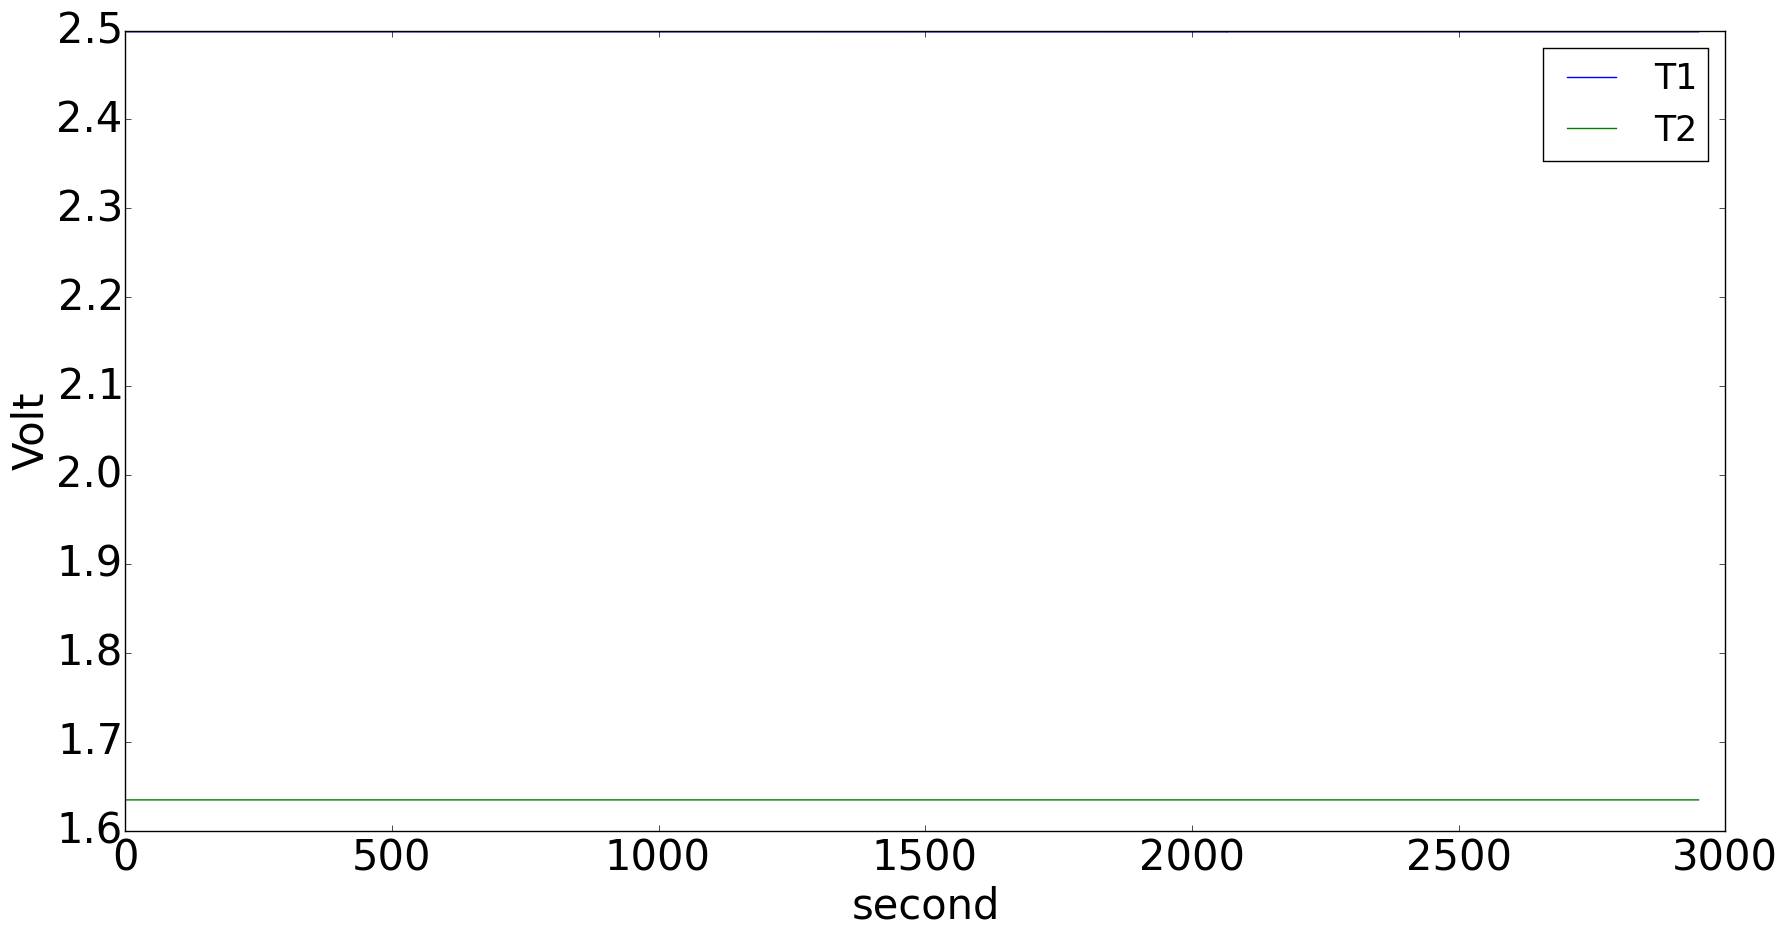

In [12]:
fig3=figure(figsize=(20, 10))
ax1=plt[:axes]([.15,.1,.8,.8])
    p1=ax1[:plot](timeaxis,VT1,label=varnames[1])
    p2=ax1[:plot](timeaxis,VT2,label=varnames[2])
ax1[:legend](handles=[p1,p2],fontsize=25);
ax1[:set_ylabel]("Volt",fontsize=30)
ax1[:set_xlabel]("second",fontsize=30)
plt[:xticks](fontsize=30)
plt[:yticks](fontsize=30)

fig2[:savefig]("time_series_temperature_probes.png")
plt[:draw]()

In [13]:
Fs = 320 # sample frequency
T20s=20*Fs
T=size(dataBuffer,1)
nb_segment=Int(floor(T/T20s))
segments_shear1 = zeros(T20s, nb_segment);
segments_shear2 = zeros(T20s, nb_segment);
segments_T1    = zeros(T20s, nb_segment);
segments_T2    = zeros(T20s, nb_segment);
segments_Ax    = zeros(T20s, nb_segment);
segments_Ay    = zeros(T20s, nb_segment);
segments_Az    = zeros(T20s, nb_segment);
i=1
for l = 1:T20s:nb_segment*T20s 
        segments_shear1[:,i]=VShear1[l:l+T20s-1]
        segments_shear2[:,i]=VShear2[l:l+T20s-1]
        segments_T1[:,i]=VT1[l:l+T20s-1]
        segments_T2[:,i]=VT2[l:l+T20s-1]
        segments_Ax[:,i]=gAx[l:l+T20s-1]
        segments_Ay[:,i]=gAy[l:l+T20s-1]
        segments_Az[:,i]=gAz[l:l+T20s-1]
   i+=1
end


In [14]:
    (k,spec_shear1)=makefft(segments_shear1,Fs);
    (k,spec_shear2)=makefft(segments_shear2,Fs);
    (k,spec_T1)=makefft(segments_T1,Fs);
    (k,spec_T2)=makefft(segments_T2,Fs);
    (k,spec_Ax)=makefft(segments_Ax,Fs);
    (k,spec_Ay)=makefft(segments_Ay,Fs);
    (k,spec_Az)=makefft(segments_Az,Fs);
    mspec_shear1=mean(spec_shear1,2);
    mspec_shear2=mean(spec_shear2,2);
    mspec_T1=mean(spec_T1,2);
    mspec_T2=mean(spec_T2,2);
    mspec_Ax=mean(spec_Ax,2);
    mspec_Ay=mean(spec_Ay,2);
    mspec_Az=mean(spec_Az,2);


In [22]:
    noise24= bitnoise_24();
    noise20= bitnoise_20();
    #fs     = 320
    #f      = f./(32*fs)
    sinc4  = (sin(k)./k).^4;

In [28]:
close()

In [29]:
fig3=figure(figsize=(20, 10))
ax1=plt[:axes]([.1,.1,.8,.8])
    p1=ax1[:semilogy](k,mspec_shear1,label=varnames[3])
    p2=ax1[:semilogy](k,mspec_shear2,label=varnames[4])
p3=ax1[:semilogy](k,noise24+0*k,label="noise 24 bit",lw=3)
p4=ax1[:semilogy](k,noise20+0*k,label="noise 20 bit",lw=3)
p5=ax1[:semilogy](k,sinc4,label="sinc4")
ax1[:legend](fontsize=25);
ax1[:set_ylabel]("Volt^2/Hz",fontsize=30)
ax1[:set_xlabel]("Hz",fontsize=30)
ax1[:set_title]("Spectrum",fontsize=30)
plt[:xticks](fontsize=30)
plt[:yticks](fontsize=30)
fig3[:savefig]("shear_probes_spectra.png")
plt[:draw]()


LoadError: LoadError: PyError (:PyObject_Call) <class 'OSError'>
OSError(24, 'Too many open files')
  File "/Users/aleboyer/anaconda/lib/python3.4/site-packages/matplotlib/figure.py", line 1476, in savefig
    self.canvas.print_figure(*args, **kwargs)
  File "/Users/aleboyer/anaconda/lib/python3.4/site-packages/matplotlib/backend_bases.py", line 2211, in print_figure
    **kwargs)
  File "/Users/aleboyer/anaconda/lib/python3.4/site-packages/matplotlib/backends/backend_agg.py", line 521, in print_png
    FigureCanvasAgg.draw(self)
  File "/Users/aleboyer/anaconda/lib/python3.4/site-packages/matplotlib/backends/backend_agg.py", line 469, in draw
    self.figure.draw(self.renderer)
  File "/Users/aleboyer/anaconda/lib/python3.4/site-packages/matplotlib/artist.py", line 59, in draw_wrapper
    draw(artist, renderer, *args, **kwargs)
  File "/Users/aleboyer/anaconda/lib/python3.4/site-packages/matplotlib/figure.py", line 1085, in draw
    func(*args)
  File "/Users/aleboyer/anaconda/lib/python3.4/site-packages/matplotlib/artist.py", line 59, in draw_wrapper
    draw(artist, renderer, *args, **kwargs)
  File "/Users/aleboyer/anaconda/lib/python3.4/site-packages/matplotlib/axes/_base.py", line 2110, in draw
    a.draw(renderer)
  File "/Users/aleboyer/anaconda/lib/python3.4/site-packages/matplotlib/artist.py", line 59, in draw_wrapper
    draw(artist, renderer, *args, **kwargs)
  File "/Users/aleboyer/anaconda/lib/python3.4/site-packages/matplotlib/axis.py", line 1116, in draw
    renderer)
  File "/Users/aleboyer/anaconda/lib/python3.4/site-packages/matplotlib/axis.py", line 1065, in _get_tick_bboxes
    extent = tick.label1.get_window_extent(renderer)
  File "/Users/aleboyer/anaconda/lib/python3.4/site-packages/matplotlib/text.py", line 798, in get_window_extent
    bbox, info, descent = self._get_layout(self._renderer)
  File "/Users/aleboyer/anaconda/lib/python3.4/site-packages/matplotlib/text.py", line 320, in _get_layout
    ismath=ismath)
  File "/Users/aleboyer/anaconda/lib/python3.4/site-packages/matplotlib/backends/backend_agg.py", line 228, in get_text_width_height_descent
    self.mathtext_parser.parse(s, self.dpi, prop)
  File "/Users/aleboyer/anaconda/lib/python3.4/site-packages/matplotlib/mathtext.py", line 2992, in parse
    font_output = fontset_class(prop, backend)
  File "/Users/aleboyer/anaconda/lib/python3.4/site-packages/matplotlib/mathtext.py", line 683, in __init__
    self._stix_fallback = StixFonts(*args, **kwargs)
  File "/Users/aleboyer/anaconda/lib/python3.4/site-packages/matplotlib/mathtext.py", line 917, in __init__
    TruetypeFonts.__init__(self, *args, **kwargs)
  File "/Users/aleboyer/anaconda/lib/python3.4/site-packages/matplotlib/mathtext.py", line 569, in __init__
    default_font = self.CachedFont(FT2Font(filename))

while loading In[29], in expression starting on line 14

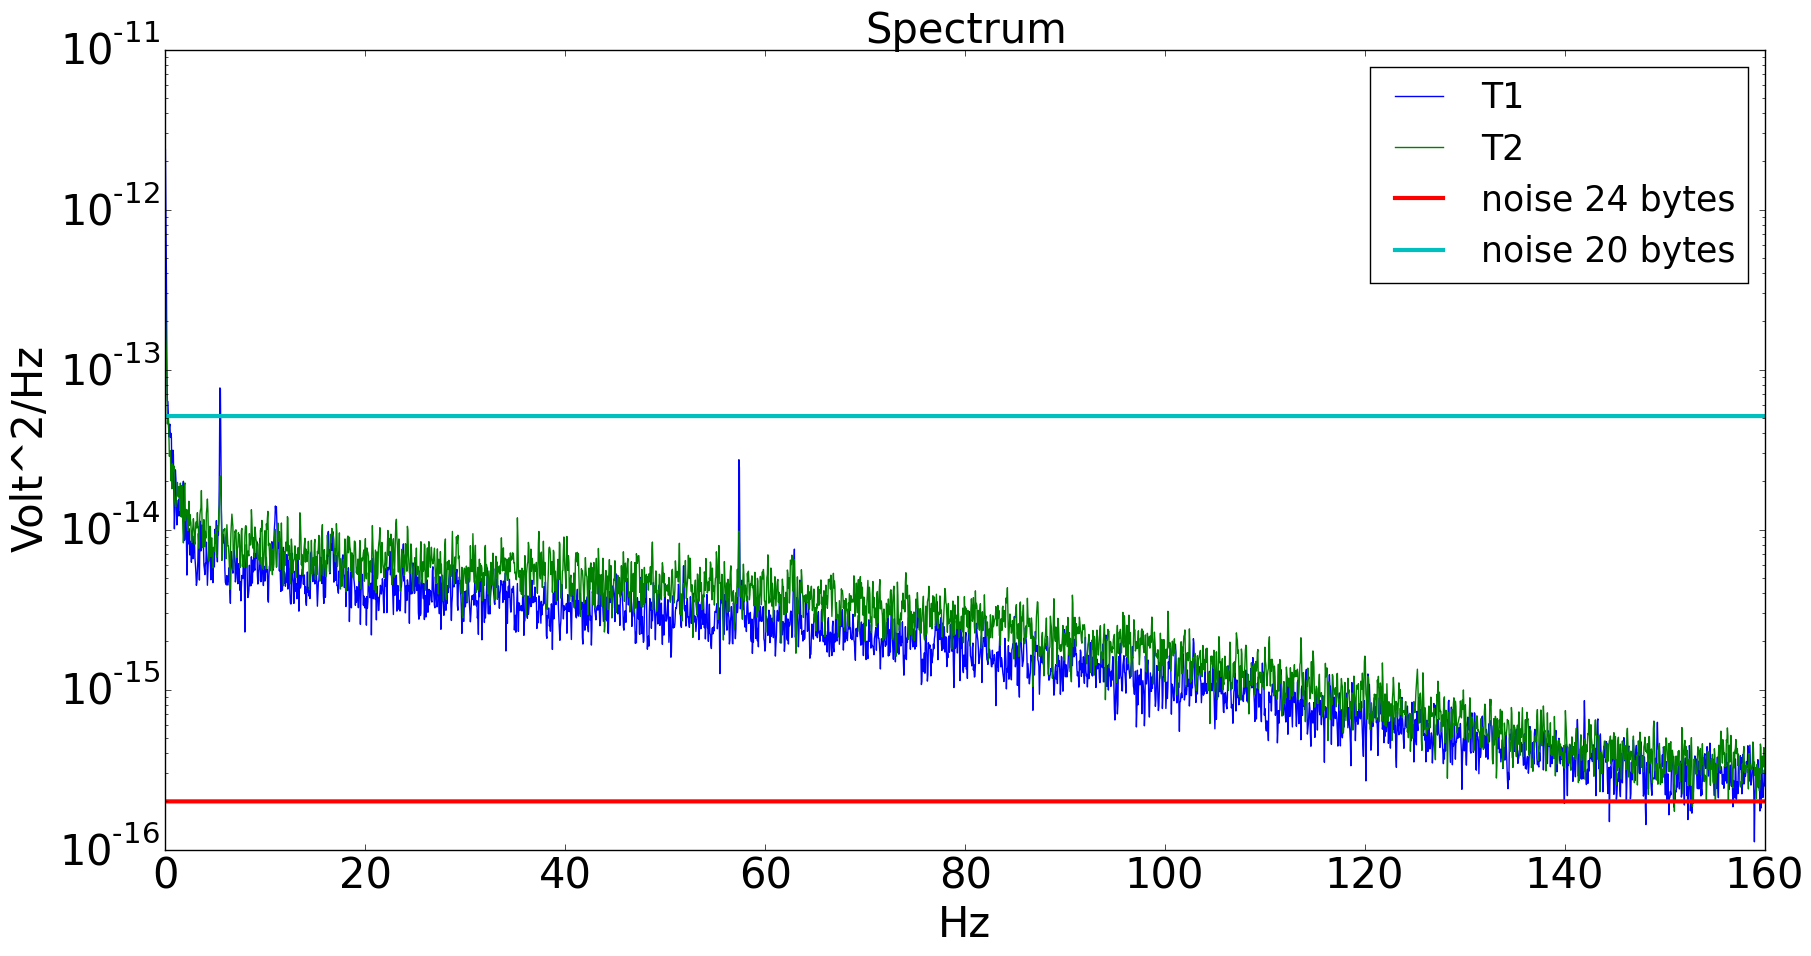

In [24]:
fig3=figure(figsize=(20, 10))
ax1=plt[:axes]([.1,.1,.8,.8])
    p1=ax1[:semilogy](k,mspec_T1,label=varnames[1])
    p2=ax1[:semilogy](k,mspec_T2,label=varnames[2])
p3=ax1[:semilogy](k,noise24+0*k,label="noise 24 bytes",lw=3)
    p4=ax1[:semilogy](k,noise20+0*k,label="noise 20 bytes",lw=3)
ax1[:legend](handles=[p1,p2,p3,p4],fontsize=25);
ax1[:set_ylabel]("Volt^2/Hz",fontsize=30)
ax1[:set_xlabel]("Hz",fontsize=30)
ax1[:set_title]("Spectrum",fontsize=30)
plt[:xticks](fontsize=30)
plt[:yticks](fontsize=30)
fig3[:savefig]("Temperature_probes_spectra.png")
plt[:draw]()

In [25]:
mean(var(segments_T1,1))

1.4734518687284961e-12

In [26]:
df=Fs/T20s
2*mean(sum(spec_T1,1)*df,2)

1x1 Array{Float64,2}:
 1.20433e-12

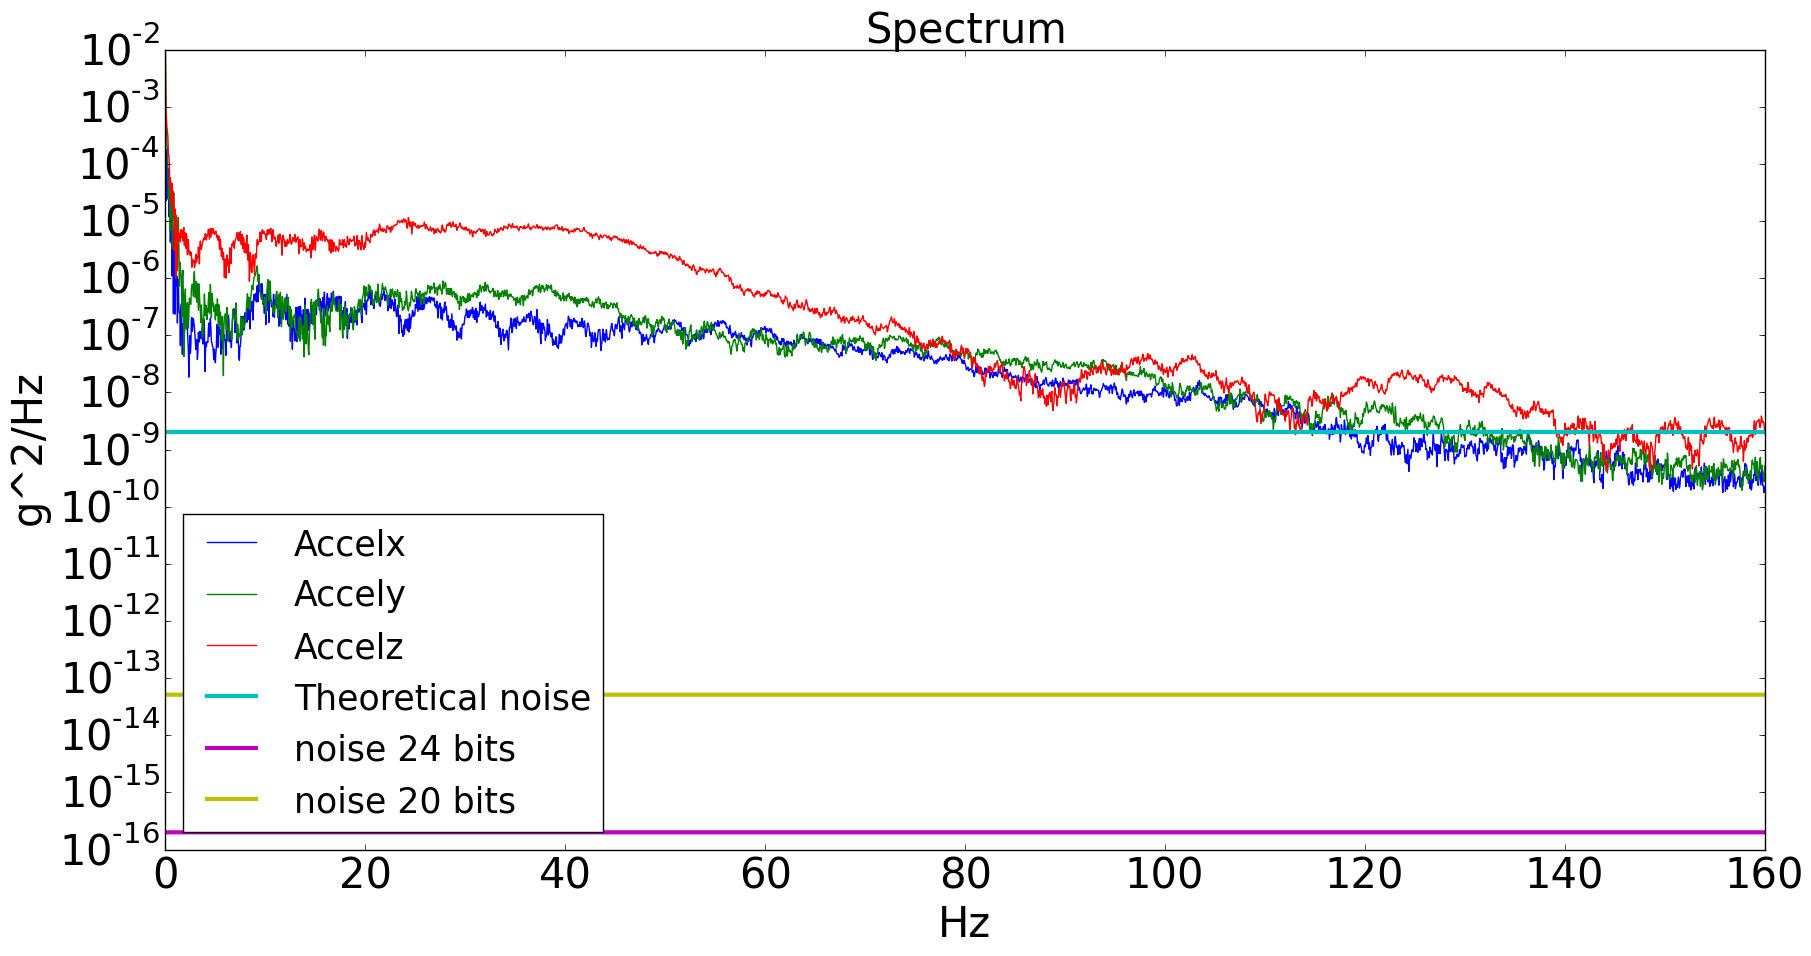

In [27]:
fig4=figure(figsize=(20, 10))
ax1=plt[:axes]([.1,.1,.8,.8])
p1=ax1[:semilogy](k,2*mspec_Ax,label=varnames[end-2])
p2=ax1[:semilogy](k,2*mspec_Ay,label=varnames[end-1])
p3=ax1[:semilogy](k,2*mspec_Az,label=varnames[end])
p4=ax1[:semilogy](k,45e-6^2+0*k,label="Theoretical noise",lw=3)
p5=ax1[:semilogy](k,noise24+0*k,label="noise 24 bits",lw=3)
p6=ax1[:semilogy](k,noise20+0*k,label="noise 20 bits",lw=3)

ax1[:legend](handles=[p1,p2,p3,p4,p5,p6],loc=3,fontsize=25);
ax1[:set_ylabel]("g^2/Hz",fontsize=30)
ax1[:set_xlabel]("Hz",fontsize=30)
ax1[:set_title]("Spectrum",fontsize=30)
plt[:xticks](fontsize=30)
plt[:yticks](fontsize=30)
fig4[:savefig]("accell_probes_spectra_160722.png")
plt[:draw]()

